<a href="https://colab.research.google.com/github/AliAkbarBadri/mountain-car-v0/blob/master/cnn_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup



In [ ]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install pyglet
!pip install q keras==1.2.2
%tensorflow_version 1.x
import tensorflow as tf
import matplotlib.animation as animation
from IPython.display import HTML
from IPython.display import display as ipy_disp
import keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gym
import random
import cv2
import collections
from time import sleep
import os

In [2]:
def get_screen():
  global display
  try:
    display.stop()
  except:
    pass
  from pyvirtualdisplay import Display
  display = Display(visible=0, size=(1400, 900))
  display.start()
  
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

get_screen()

In [3]:
mpl.rc('animation', html='jshtml')
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

# Test

In [4]:
!ls "/content/drive/My Drive/nn/rl/original_cnn.h5"

'/content/drive/My Drive/nn/rl/original_cnn.h5'


In [ ]:
def process_image(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (150, 100))
    image = np.float32(np.true_divide(image,255))
    return image

def greedy_action(current_state):
    action_mask = np.ones((1, 3))
    q_values = learnt_model.predict_on_batch([current_state, action_mask])[0]
    action = np.argmax(q_values)
    return action
learnt_model = keras.models.load_model('/content/drive/My Drive/nn/rl/original_cnn.h5',
                 custom_objects = {"huber_loss":tf.losses.huber_loss})

In [6]:
env = gym.make('MountainCar-v0').env
seq_memory = collections.deque(maxlen=4)
done = False
steps = 0
frame_skip = 4
stack_depth = 4
trials = 100
trial_len = 200
all_rewards_test = []

In [7]:
for episode in range(trials+1):
    seq_memory.clear()
    initial_state = env.reset()
    current_image = env.render(mode = 'rgb_array')
    frame = process_image(current_image)
    frame = frame.reshape(1, frame.shape[0], frame.shape[1])
    current_state = np.repeat(frame, stack_depth, axis=0)
    seq_memory.extend(current_state)
    episode_reward = 0
    for step in range(trial_len):
        if step % frame_skip == 0:
            if np.random.rand() <= 0:
                action = np.int(np.random.choice([0, 2], 1))
            else:
                action = greedy_action(current_state.reshape(1, current_state.shape[0] \
                                      , current_state.shape[1], current_state.shape[2]))
        next_pos, reward, done, _ = env.step(action)
        next_frame = env.render(mode='rgb_array')
        next_frame = process_image(next_frame)
        seq_memory.append(next_frame)
        next_state = np.asarray(seq_memory)
        current_state = next_state
        if done:
            break
    all_rewards_test.append(step+1)
    print("Iteration: {} Score: -{}".format(episode, step+1))
env.close()

Iteration: 0 Score: -89
Iteration: 1 Score: -92
Iteration: 2 Score: -129
Iteration: 3 Score: -117
Iteration: 4 Score: -88
Iteration: 5 Score: -123
Iteration: 6 Score: -120
Iteration: 7 Score: -114
Iteration: 8 Score: -88
Iteration: 9 Score: -112
Iteration: 10 Score: -112
Iteration: 11 Score: -111
Iteration: 12 Score: -84
Iteration: 13 Score: -96
Iteration: 14 Score: -109
Iteration: 15 Score: -125
Iteration: 16 Score: -107
Iteration: 17 Score: -112
Iteration: 18 Score: -91
Iteration: 19 Score: -95
Iteration: 20 Score: -115
Iteration: 21 Score: -96
Iteration: 22 Score: -178
Iteration: 23 Score: -156
Iteration: 24 Score: -107
Iteration: 25 Score: -94
Iteration: 26 Score: -147
Iteration: 27 Score: -124
Iteration: 28 Score: -88
Iteration: 29 Score: -103
Iteration: 30 Score: -112
Iteration: 31 Score: -88
Iteration: 32 Score: -119
Iteration: 33 Score: -90
Iteration: 34 Score: -126
Iteration: 35 Score: -112
Iteration: 36 Score: -120
Iteration: 37 Score: -134
Iteration: 38 Score: -103
Iteration

In [8]:
print("mean reward: ",np.mean(all_rewards_test),", best reward:",np.min(all_rewards_test),", first win episode:",np.argmin(all_rewards_test))

mean reward:  110.83168316831683 , best reward: 84 , first win episode: 12


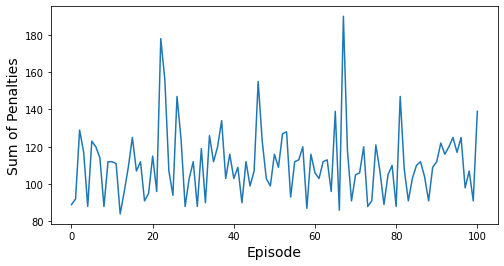

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(all_rewards_test)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of Penalties", fontsize=14)
plt.show()

# Video

In [10]:
frames = []
env = gym.make('MountainCar-v0').env
seq_memory.clear()
initial_state = env.reset()
current_image = env.render(mode = 'rgb_array')
frame = process_image(current_image)
frame = frame.reshape(1, frame.shape[0], frame.shape[1])
current_state = np.repeat(frame, stack_depth, axis=0)
seq_memory.extend(current_state)
episode_reward = 0
for step in range(trial_len):
    if step % frame_skip == 0:
        if np.random.rand() <= 0:
            action = np.int(np.random.choice([0, 2], 1))
        else:
            action = greedy_action(current_state.reshape(1, current_state.shape[0] \
                                  , current_state.shape[1], current_state.shape[2]))
        
    next_pos, reward, done, _ = env.step(action)
    next_frame = env.render(mode='rgb_array')
    frames.append(next_frame)
    next_frame = process_image(next_frame)
    seq_memory.append(next_frame)
    next_state = np.asarray(seq_memory)
    current_state = next_state
    # sleep(0.01)
    if done:
        break
all_rewards_test.append(step+1)
print("Iteration: {} Score: -{}".format(episode, step+1))
env.close()

Iteration: 100 Score: -120


In [11]:
plot_animation(frames)